In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway


In [2]:
df=pd.read_csv("Sales_data_zone_wise.csv")

In [3]:
df

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


# Checking for null values

In [4]:
df.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

There are no null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


# 1.The mean sales generated by each zone.

In [6]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


The mean can be found from the describe function.

The mean sales generated by Zone A=1540493.138.

The mean sales generated by Zone B=1755559.586.

The mean sales generated by Zone C=1772871.034.

The mean sales generated by Zone D=1842926.759.


C:\Users\ollak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ollak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ollak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

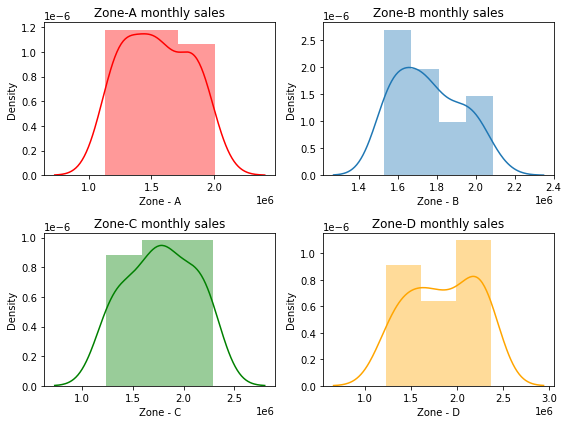

In [7]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.title("Zone-A monthly sales")
sns.distplot(df["Zone - A"],color="red")

plt.subplot(2,2,2)
plt.title("Zone-B monthly sales")
sns.distplot(df["Zone - B"])

plt.subplot(2,2,3)
plt.title("Zone-C monthly sales")
sns.distplot(df["Zone - C"],color="green")

plt.subplot(2,2,4)
plt.title("Zone-D monthly sales")
sns.distplot(df["Zone - D"],color="orange")

plt.tight_layout()

# 2. Total sales generated by all the zones for each month

In [8]:
#Adding a new column named Total sales to find out the total sales generated by all zones for each month.
df["Total_Sales"]=df.sum(axis=1)
df

C:\Users\ollak\AppData\Local\Temp\ipykernel_12168\1061282488.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["Total_Sales"]=df.sum(axis=1)


,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total_Sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


# 3.Check whether all the zones generate the same amount of sales.


Null Hypothesis,H0: All the zones generate the same amount of sales.

Alternate Hypothesis,H1: Atleast one the zone generate different amount of sales.

In [9]:
alpha=0.05
f_value, p_value = stats.f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])
print('F value : ', f_value, 'P value : ',p_value)

F value :  5.672056106843581 P value :  0.0011827601694503335


In [10]:
if p_value <= alpha:
    print("Rejecting the null hypothesis")
else:
    print("Accepting null hypothesis")

Rejecting the null hypothesis


So it is clear that zones A,B,C,D generates different amount of sales.